<div align="center">
  <h2> Méthodes quantitatives en neurosciences </h2>
</div>

<div align="center">
<b><i> Cours NSC-2006, année 2015</i></b><br>
<b>Laboratoire d'introduction au filtrage</b><br>
     *Pierre Bellec, Yassine Ben Haj Ali*
</div>

### Objectifs:

Ce laboratoire a pour but de vous initier au filtrage de signaux temporels avec Matlab. Nous allons travailler avec un signal simulé qui contient plusieurs sources, une d'intérêt et d'autres qui sont du bruit. Nous allons tout d'abord nous familiariser avec les différentes sources de signal, en temps et en fréquence. Nous allons ensuite chercher un filtrage qui permette d'éliminer le bruit sans altérer de maniére forte le signal. Enfin, nous évaluerons l'impact d'une perte de résolution temporelle sur notre capacité à débruiter le signal, lié au phénomène de repliement de fréquences (aliasing). 

Pour réaliser ce laboratoire, il est nécessaire de récupérer la
ressource suivante sur [studium](https://studium.umontreal.ca/):

-   labo7_filtrage.zip: cette archive contient plusieurs codes et jeux de données. SVP décompressez l'archive et copiez les fichiers dans votre répertoire de travail Matlab.

Ne pas tenir compte et ne pas exécuter cette partie du code:

In [1]:
%matplotlib inline
from pymatbridge import Octave
octave = Octave()
octave.start()
%load_ext pymatbridge

Starting Octave on ZMQ socket ipc:///tmp/pymatbridge
Send 'exit' command to kill the server
.Octave started and connected!
Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge
Send 'exit' command to kill the server
.MATLAB started and connected!


### Section 1 : Exemple de signaux, temps et fréquence

<ol start="1">
  <h4><li> Commençons par générer un signal d'intêret:</li></h4>
</ol>

In [536]:
%%matlab
freq = 1/2;
bloc = repmat([zeros(1,15*freq) ones(1,15*freq)],[1 10]);
ech = (0:(1/freq):(length(bloc)/freq)-(1/freq));
pic = 5;
noyau = [linspace(0,1,(pic*freq)+1) linspace(1,-0.3,(pic*freq)/2) linspace(-0.3,0,(pic*freq)/2)];
noyau = [zeros(1,length(noyau)-1) noyau];
noyau = noyau/sum(abs(noyau));
signal = conv(bloc,noyau,'same');
signal = signal - mean(signal);

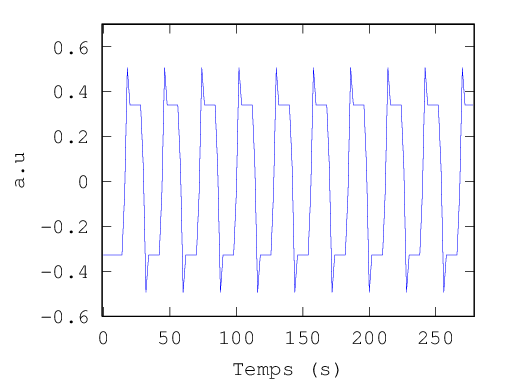

In [537]:
%%matlab
plot(ech,signal)
xlim([-1 max(ech)+1])
ylim([-0.6 0.7])
xlabel('Temps (s)')
ylabel('a.u')

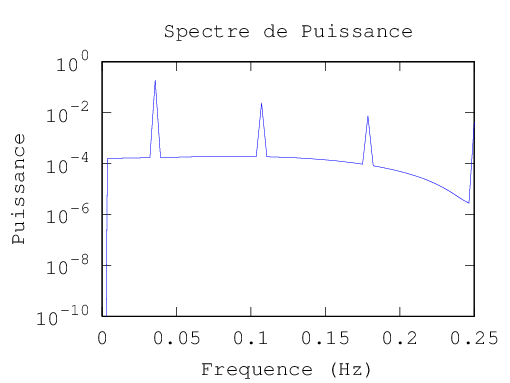

In [540]:
%%matlab
Analyse_Frequence_Puissance(signal,ech);
set(gca,'yscale','log');
ylim([10^(-10) 1])

In [541]:
%%matlab
bruit = 0.05*randn(size(signal));

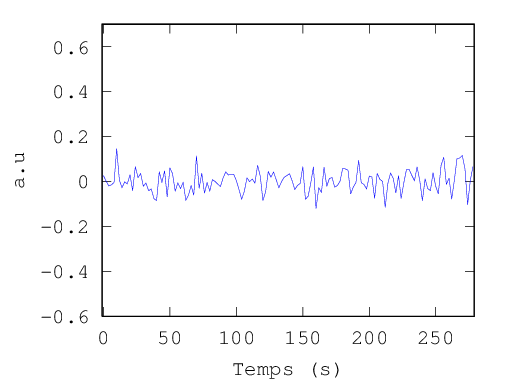

In [542]:
%%matlab
plot(ech,bruit)
xlim([-1 max(ech)+1])
ylim([-0.6 0.7])
xlabel('Temps (s)')
ylabel('a.u')

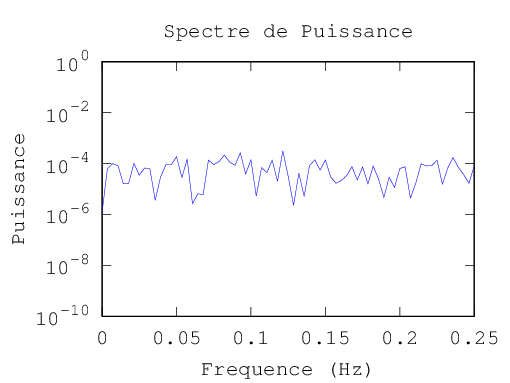

In [544]:
%%matlab
Analyse_Frequence_Puissance(bruit,ech);
set(gca,'yscale','log');
ylim([10^(-10) 1])

In [545]:
%%matlab
freq_resp = 0.3;
freq_mod = 0.01;
resp = cos(2*pi*freq_resp*ech/freq);
resp = resp.*(ones(size(resp))-0.1*cos(2*pi*freq_mod*ech/freq));
resp = 0.1*(resp-mean(resp));

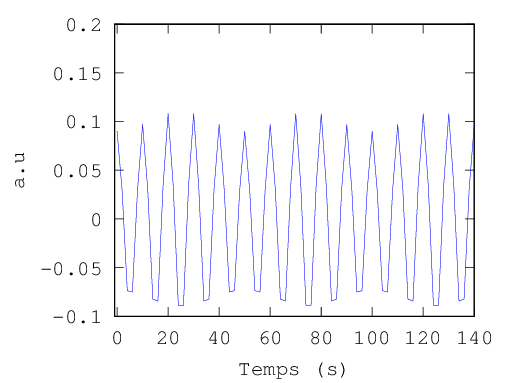

In [546]:
%%matlab
plot(ech,resp)
xlim([-1 max(ech)/2+1])
%ylim([-0.6 0.7])
xlabel('Temps (s)')
ylabel('a.u')

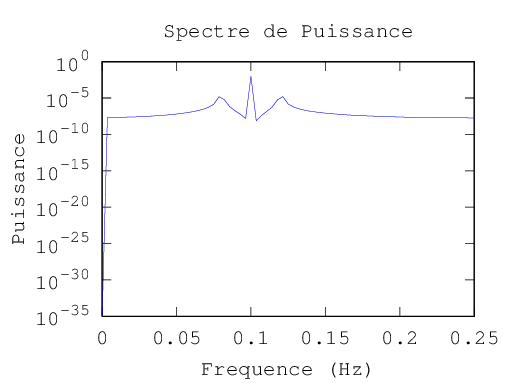

In [547]:
%%matlab
[ech_f,signal_f,signal_af,signal_pu] = Analyse_Frequence_Puissance(resp,ech);
set(gca,'yscale','log');
ylim([10^(-35) 1])

the baseline

In [548]:
%%matlab
base = 0.1*(ech-mean(ech))/mean(ech);

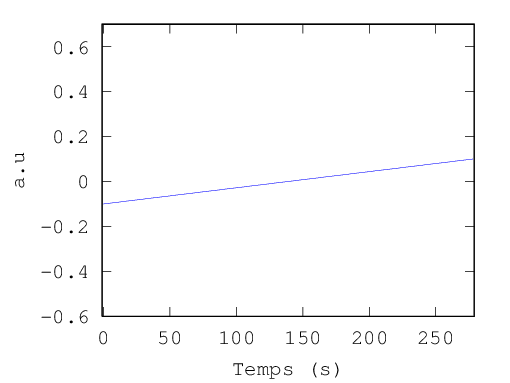

In [549]:
%%matlab
plot(ech,base)
xlim([-1 max(ech)+1])
ylim([-0.6 0.7])
%ylim([-0.6 0.8])
xlabel('Temps (s)')
ylabel('a.u')

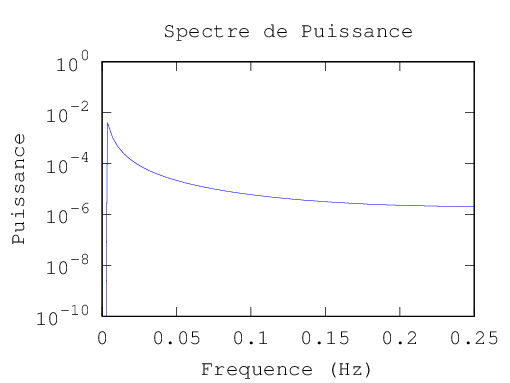

In [551]:
%%matlab
[ech_f,base_f,base_af,base_pu] = Analyse_Frequence_Puissance(base,ech);
set(gca,'yscale','log');
ylim([10^(-10) 1])

Now is time to mix everything

In [552]:
%%matlab
%y = signal + base + resp + bruit;
y = signal + resp;

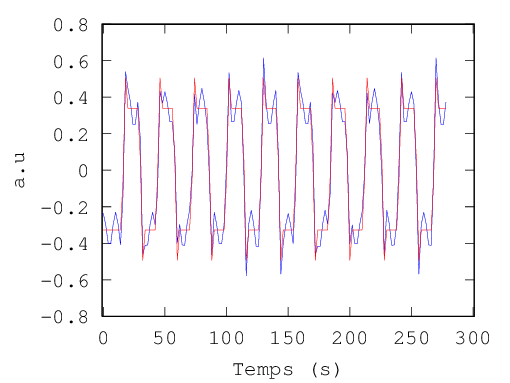

In [553]:
%%matlab
plot(ech,y)
hold on
plot(ech,signal,'r')
xlim([-1 301])
ylim([-0.8 0.8])
xlabel('Temps (s)')
ylabel('a.u')

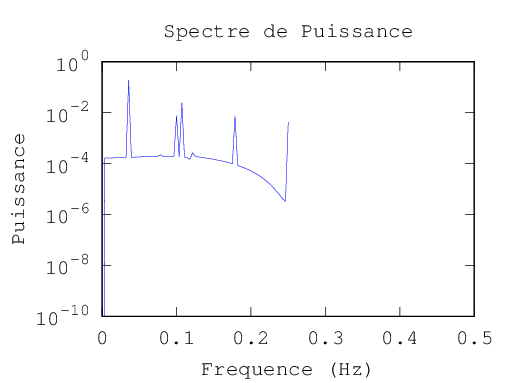

In [554]:
%%matlab
[freq_f,y_f,y_af,y_pu] = Analyse_Frequence_Puissance(y,ech);
set(gca,'yscale','log');
xlim([0 0.5])
ylim([10^(-10) 1])

### Section 2: Optimisation de filtre

Nous allons commencer par une approche simple pour retirer le bruit: une moyenne mobile. 

In [557]:
%%matlab
taille = ceil(6*freq);
noyau = [zeros(1,(length(y)-taille)/2) ones(1,taille) zeros(1,(length(y)-taille)/2)];
noyau = noyau/sum(abs(noyau));
y_f = conv(y,noyau,'same');

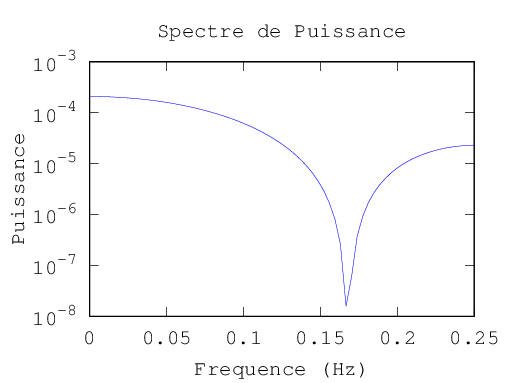

In [558]:
%%matlab
Analyse_Frequence_Puissance(noyau,ech);
set(gca,'yscale','log');

err =  0.11195


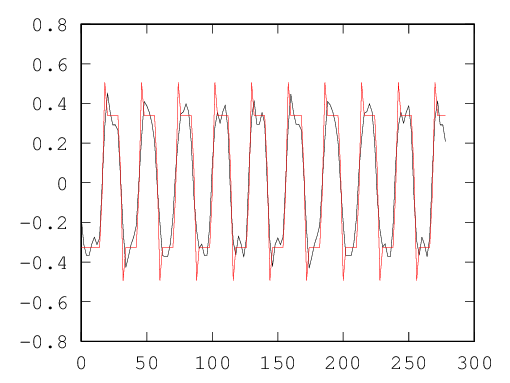

In [559]:
%%matlab
plot(ech,y_f,'k')
hold on
plot(ech,signal,'r')
err = sqrt(mean((signal-y_f).^2))

In [562]:
%%matlab
impulsion = zeros(size(y));
impulsion(round(length(impulsion)/2))=1;
noyau = FiltrePasseHaut(impulsion,freq,0.1);

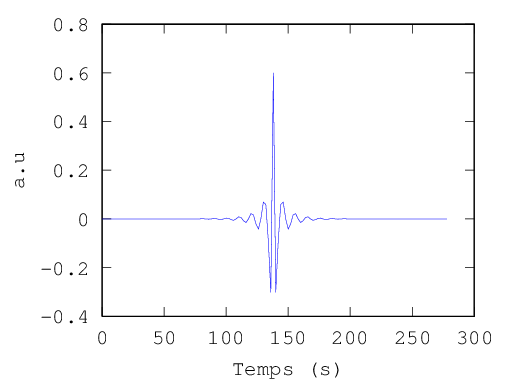

In [564]:
%%matlab
plot(ech,noyau)
xlabel('Temps (s)')
ylabel('a.u')

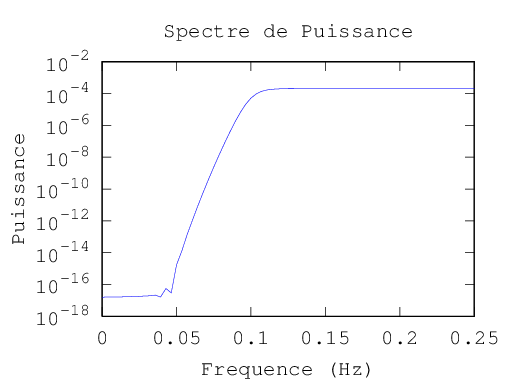

In [565]:
%%matlab
Analyse_Frequence_Puissance(noyau,ech);
set(gca,'yscale','log');



err =  0.17829


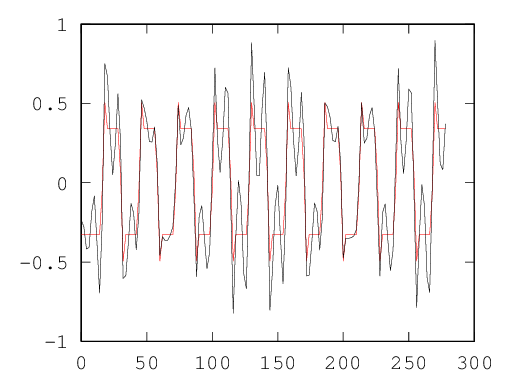

In [567]:
%%matlab

%signal + resp
y_f = FiltrePasseHaut(y,freq,0.05);
y_f = y_f+FiltrePasseBas(y,freq,0.15);

%signal+resp+bruit
%y_f = FiltrePasseBas(y,freq,0.2);

%signal+base+resp+bruit
%y_f = FiltrePasseHaut(y,freq,0.02);
%y_f = FiltrePasseBas(y_f,freq,0.2);

plot(ech,signal,'r')
hold on
plot(ech,y_f,'k')
err = sqrt(mean((signal-y_f).^2))